In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_images=pd.read_csv('gdrive/My Drive/train.csv')

In [0]:
train_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train=train_images.iloc[:,0].values

In [0]:
train_images=train_images.drop('label',axis=1)

In [0]:
train_list=[]
for i in range(42000):
    img=train_images.iloc[i]
    img=np.array(img)
    img=img.reshape(28,28)
    train_list.append(img)
X_train=np.stack(train_list)

In [11]:
X_train.shape

(42000, 28, 28)

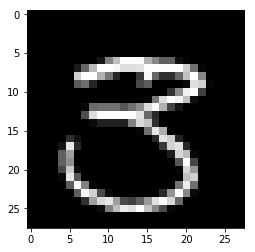

In [14]:
plt.imshow(X_train[7],cmap='gray')

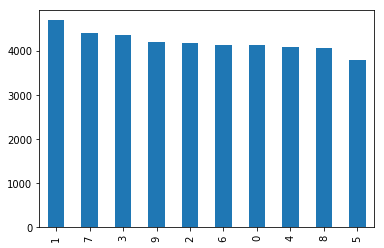

In [15]:
y_train_disp=pd.DataFrame({'categories':y_train})
y_train_disp['categories'].value_counts().plot.bar()

In [0]:
test_images=pd.read_csv('gdrive/My Drive/test.csv')

In [17]:
test_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_list=[]
for i in range(28000):
    img=test_images.iloc[i]
    img=np.array(img)
    img=img.reshape(28,28)
    test_list.append(img)
X_test=np.stack(test_list)

In [19]:
X_test.shape

(28000, 28, 28)

In [20]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255.0
X_test /= 255.0
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

X_train shape: (42000, 28, 28, 1)
Number of images in x_train 42000
Number of images in x_test 28000


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten,LeakyReLU
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import regularizers

Using TensorFlow backend.
W0614 11:58:38.755629 140090436659072 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py:99: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W0614 11:58:38.757129 140090436659072 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py:99: The name tf.AttrValue is deprecated. Please use tf.compat.v1.AttrValue instead.

W0614 11:58:38.758090 140090436659072 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py:99: The name tf.COMPILER_VERSION is deprecated. Please use tf.version.COMPILER_VERSION instead.

W0614 11:58:38.758977 140090436659072 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py:99: The name tf.CXX11_ABI_FLAG is deprecated. Please use tf.sysconfig.CXX11_ABI_FLAG instead.

W0614 11:58:38.759983 140090436659072 deprecation_wrapper.py:118] From /usr/lo

In [22]:
model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape=(28, 28, 1)))
model.add(LeakyReLU(0.1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Dropout(0.25))
#Second conv-conv-pool layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(0.1))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Dropout(0.25))
#Flatten
model.add(Flatten())
#First FC layer 
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))
#Second FC layer 
model.add(Dense(10, activation="softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

W0614 11:58:43.733382 140090436659072 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 11:58:43.744738 140090436659072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0614 11:58:43.987157 140090436659072 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
__________

In [24]:
model.fit(X_train, y_train, batch_size=64,epochs=30)

W0614 11:59:00.684337 140090436659072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1251: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
42000/42000 [==============================] - 385s 9ms/step - loss: 0.1724 - acc: 0.9440
Epoch 2/30
42000/42000 [==============================] - 395s 9ms/step - loss: 0.0597 - acc: 0.9820
Epoch 3/30
42000/42000 [==============================] - 403s 10ms/step - loss: 0.0430 - acc: 0.9865
Epoch 4/30
42000/42000 [==============================] - 402s 10ms/step - loss: 0.0392 - acc: 0.9882
Epoch 5/30
42000/42000 [==============================] - 400s 10ms/step - loss: 0.0346 - acc: 0.9889
Epoch 6/30
42000/42000 [==============================] - 393s 9ms/step - loss: 0.0289 - acc: 0.9903
Epoch 7/30
42000/42000 [==============================] - 391s 9ms/step - loss: 0.0274 - acc: 0.9912
Epoch 8/30
42000/42000 [==============================] - 388s 9ms/step - loss: 0.0285 - acc: 0.9916
Epoch 9/30
42000/42000 [==============================] - 388s 9ms/step - loss: 0.0261 - acc: 0.9916
Epoch 10/30
42000/42000 [==============================] - 388s 9ms/step - loss: 0.0229 

In [0]:
y_pred=model.predict_classes(X_test)

In [26]:
ilist=1+np.arange(28000)
print(len(ilist))

28000


In [0]:
model.save('gdrive/My Drive/Model.h5')

In [0]:
solution_dict={'ImageId':ilist,'Label':y_pred}

In [0]:
solution_dataframe=pd.DataFrame(solution_dict)

In [0]:
solution_dataframe.to_csv('gdrive/My Drive/soln.csv',index=False)